In [1]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [2]:
baseImdb = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/theBaseIds.csv', encoding='ISO-8859-1')
bechdelDataset = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/mergeWithRevenue.csv', encoding='ISO-8859-1')                                          

In [3]:
len(bechdelDataset)

7446

In [4]:
bechdelDataset.isnull().sum()


Unnamed: 0                      0
Unnamed: 0.1                    0
Unnamed: 0.1.1                  0
index                           0
id                              0
imdb_id                         2
Rating                          0
Title                           0
Year                            0
Unnamed: 0_y                 4578
color                        4705
director_name                  10
num_critic_for_reviews       4703
duration                       33
director_facebook_likes      4706
actor_3_facebook_likes       4707
actor_2_name                 4704
actor_1_facebook_likes       4703
gross                        4898
genres                         12
actor_1_name                 4703
num_voted_users              4703
cast_total_facebook_likes    4703
actor_3_name                 4707
facenumber_in_poster         4708
plot_keywords                4711
movie_imdb_link              4703
num_user_for_reviews         4703
language                        9
country       

In [5]:
baseImdbDataset = bechdelDataset[bechdelDataset.imdb_id.isin(baseImdb.imdb_ids)]

In [6]:
cpiData = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/cpi.csv')
cpiData.head()

,Year,Avg
0,1913,9.9
1,1914,10.0
2,1915,10.1
3,1916,10.9
4,1917,12.8


In [7]:
#Lets fill in columns based on rating
for i in range(len(bechdelDataset)):
    rating = bechdelDataset.iloc[i]['Rating']
    if (rating == 0):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'nowomen')
        bechdelDataset.set_value(i, 'clean_test', 'nowomen')
    if (rating == 1):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'notalk')
        bechdelDataset.set_value(i, 'clean_test', 'notalk')
    if (rating == 2):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'men')
        bechdelDataset.set_value(i, 'clean_test', 'men')
    if (rating == 3):
        bechdelDataset.set_value(i, 'binary', 'PASS')
        bechdelDataset.set_value(i, 'test', 'ok')
        bechdelDataset.set_value(i, 'clean_test', 'ok')
            

            

In [8]:
#And adjust box office revenue data by the cpi data too
from decimal import Decimal
from re import sub

baseCPI = cpiData[cpiData['Year'] == 2013]['Avg']

In [9]:
for i in range(len(bechdelDataset)):
    internationalGross = bechdelDataset.iloc[i]['intgross_2013$']
    domGross = bechdelDataset.iloc[i]['domgross_2013$']
    if (pd.notnull(internationalGross) and pd.notnull(domGross)):
        bechdelDataset.set_value(i,'adjusted_box_office', internationalGross + domGross)
    else:
        if (pd.notnull(bechdelDataset.iloc[i]['box_office'])):
            boxOfficeVal = Decimal(sub(r'[^\d.]', '', bechdelDataset.iloc[i]['box_office']))
            yearMovie = bechdelDataset.iloc[i]['Year']
            yearVal = cpiData[cpiData.Year == yearMovie]['Avg'][yearMovie - 1913]
            bechdelDataset.set_value(i, 'adjusted_box_office', (yearVal/(1.0 * baseCPI)) * float(boxOfficeVal))

In [10]:
bechdelDataset.columns.values
bechdelDataset.to_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/mergeWithRevenue.csv', encoding='utf-8')

In [11]:
#Let us start with trend analysis

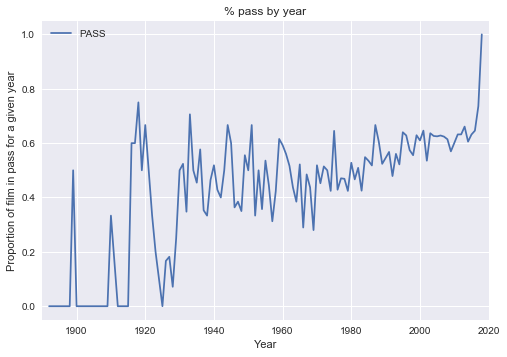

In [12]:
bechdelDataset.groupby(['binary', 'clean_test']).size()
mergedSet = bechdelDataset.groupby(['Year', 'binary']).size()
mergedSet = mergedSet.unstack('binary')
mergedSet = mergedSet.fillna(0.0)
plt.figure()
ax = ((mergedSet.PASS)/(mergedSet.PASS+mergedSet.FAIL)).plot(xlim=[1890, 2020], title='% pass by year')
                                                             
ax.legend(labels=['PASS'], loc='best')
ax.set_ylabel("Proportion of film in pass for a given year")

In [13]:
#mergedSet = mergedSet.stack('Year')
mergedSet = mergedSet.groupby((mergedSet.index//10)*10).sum()
mergedSet

binary,FAIL,PASS
Year,,
1890,11.0,1.0
1900,42.0,0.0
1910,15.0,11.0
1920,64.0,15.0
1930,96.0,88.0
1940,104.0,95.0
1950,129.0,112.0
1960,170.0,135.0
1970,171.0,160.0


In [33]:
baseMerged = baseImdbDataset.groupby(['Year', 'binary']).size()
baseMerged = baseMerged.unstack('binary')
baseMerged = baseMerged.fillna(0.0)
baseMerged = baseMerged.groupby((baseMerged.index//10)*10).sum()
print(len(baseImdbDataset))

1851


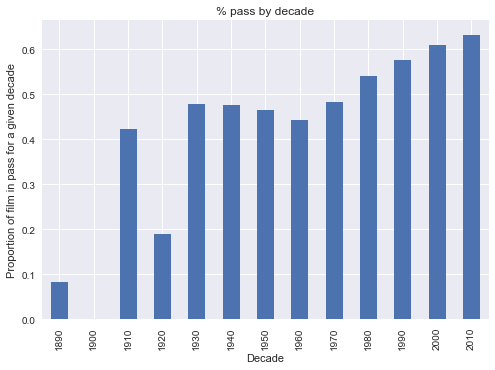

In [15]:
plt.figure()
ax = ((mergedSet.PASS)/(mergedSet.PASS+mergedSet.FAIL)).plot.bar(x=mergedSet.index, title='% pass by decade')                       
    
ax.set_ylabel("Proportion of film in pass for a given decade")
ax.set_xlabel("Decade")

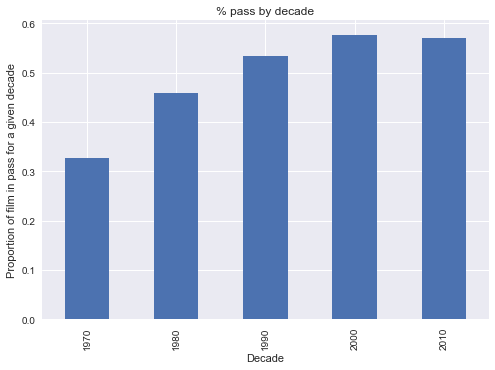

In [34]:
plt.figure()
ax = ((baseMerged.PASS)/(baseMerged.PASS+baseMerged.FAIL)).plot.bar(x=baseMerged.index, title='% pass by decade')                       
    
ax.set_ylabel("Proportion of film in pass for a given decade")
ax.set_xlabel("Decade")

The original base dataset shows a much lower pass rate for the years, but the same overall trend from the 1970s is still prominent. The 2010s seem to have a lower pass rate however.

In [17]:
bechdelDataset.genres

0                       Animation||Comedy||Short||Romance
1                                           Comedy||Short
2                                  Short||History||Horror
3                                      Documentary||Short
4                                   Short||Comedy||Horror
5                                           Short||Horror
6                                  Short||Family||Fantasy
7                                            Short||Drama
8                          Short||Comedy||Fantasy||Sci-Fi
9                                           Short||Comedy
10                                                  Short
11                                  Short||Drama||Fantasy
12                 Short||Comedy||Crime||Fantasy||Mystery
13                                          Short||Comedy
14                                          Short||Comedy
15                                                  Short
16                      Animation||Short||Comedy||Fantasy
17            

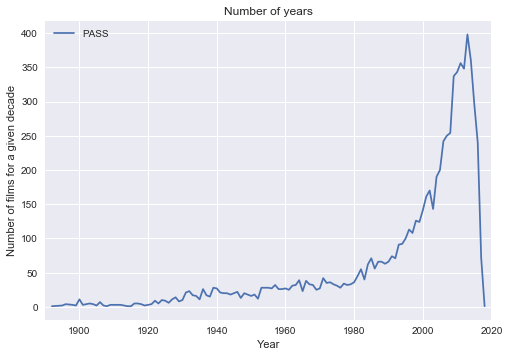

In [18]:
bechdelYears = bechdelDataset.groupby(['Year']).size()
ax = bechdelYears.plot(xlim=[1890, 2020], title='Number of years')
                                                             
ax.legend(labels=['PASS'], loc='best')
ax.set_ylabel("Number of films for a given decade")

In [19]:
from collections import defaultdict

genreDict = defaultdict(list)
for i in range(7446):
    if (type(bechdelDataset.iloc[i]['genres']) is str):
      genres = bechdelDataset.iloc[i]['genres'].split('||')
      for genre in genres:
        genreDict[genre].append(bechdelDataset.iloc[i]['binary'])

        

In [20]:
genreX = []
genreY = []
for genre in genreDict:
    genreX.append(genre)
    passNum = 0.0
    genreLen = len(genreDict[genre])
    for word in genreDict[genre]:
        if (word == 'PASS'):
            passNum += 1.0
    genreY.append(passNum/(1.0 * genreLen))
    

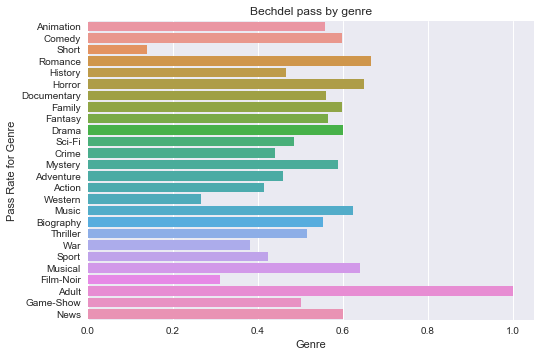

In [21]:
genreDataset = {'genre': genreX, 'pass rate': genreY}
ax = sns.barplot(x="pass rate", y="genre", data=genreDataset, orient="h")
ax.set_ylabel("Pass Rate for Genre")
ax.set_xlabel("Genre")
ax.set_title("Bechdel pass by genre")

In [22]:
theSet = bechdelDataset.groupby(['country']).size()
theSet.sort_values(ascending=False)

country
USA                                 4446
UK                                   827
France                               455
Japan                                269
Canada                               199
Germany                              175
Spain                                131
Italy                                119
Australia                             75
Sweden                                57
Hong Kong                             55
India                                 50
Ireland                               38
South Korea                           38
Denmark                               36
China                                 35
Netherlands                           28
Brazil                                27
New Zealand                           26
Mexico                                26
West Germany                          22
Belgium                               20
Argentina                             20
Norway                                19
Iran    

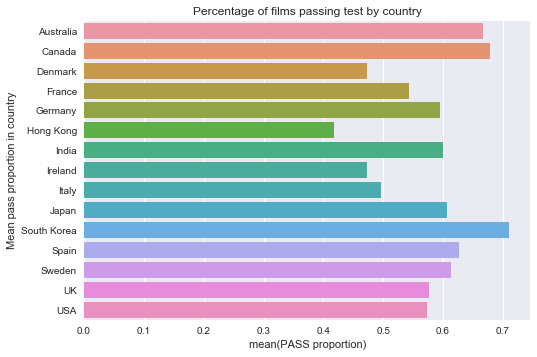

In [23]:
theSet = bechdelDataset.groupby(['country']).size()
theSet = theSet.sort_values(ascending=False)[0:15].keys()
topFifteen = bechdelDataset[bechdelDataset.country.isin(theSet)]
theSet = topFifteen.groupby(['country', 'binary']).size()
theSet = theSet.unstack('binary')
theSet['PASS proportion'] = theSet.PASS/(theSet.PASS+theSet.FAIL)
ax = sns.barplot(x=theSet['PASS proportion'], y=theSet.index.values, data=theSet, orient="h")
ax.set_title('Percentage of films passing test by country')
ax.set(ylabel='Mean pass proportion in country')

In [24]:
theSet = bechdelDataset.groupby(['country']).size()
print(theSet[0:15].keys())

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia'],
      dtype='object', name='country')


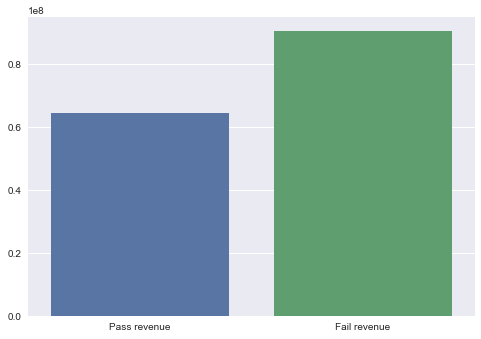

In [36]:
passDataset = bechdelDataset[bechdelDataset.binary == 'PASS']
failDataset = bechdelDataset[bechdelDataset.binary == 'FAIL']

medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
    
for revenue in failDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v")    

In [43]:
genreDict = defaultdict(list)
for i in range(7446):
    if (type(bechdelDataset.iloc[i]['genres']) is str):
      genres = bechdelDataset.iloc[i]['genres'].split('||')
      for genre in genres:
        genreDict[genre].append((bechdelDataset.iloc[i]['binary'], bechdelDataset.iloc[i]['adjusted_box_office']))

genreX = []
genreY = []

failGenreX = []
failGenreY = []

for genre in genreDict:
    genreX.append(genre)
    failGenreX.append(str(genre))
    passBoxOffices = []
    genreLen = 0.0
    failBoxOffices = []
    failGenreLen = 0.0
    
    for word, box_office in genreDict[genre]:
        if (box_office != 0.0 and word == 'FAIL'):
            failBoxOffices.append(box_office)
            failGenreLen += 1.0
            
        if (box_office != 0.0 and word == 'PASS'):
            passBoxOffices.append(box_office)
            genreLen += 1.0
                          
    genreY.append(pd.Series(passBoxOffices).median())
    failGenreY.append(pd.Series(failBoxOffices).median())


In [44]:
print(genreX)
print(failGenreX)

['Animation', 'Comedy', 'Short', 'Romance', 'History', 'Horror', 'Documentary', 'Family', 'Fantasy', 'Drama', 'Sci-Fi', 'Crime', 'Mystery', 'Adventure', 'Action', 'Western', 'Music', 'Biography', 'Thriller', 'War', 'Sport', 'Musical', 'Film-Noir', 'Adult', 'Game-Show', 'News']
['Animation', 'Comedy', 'Short', 'Romance', 'History', 'Horror', 'Documentary', 'Family', 'Fantasy', 'Drama', 'Sci-Fi', 'Crime', 'Mystery', 'Adventure', 'Action', 'Western', 'Music', 'Biography', 'Thriller', 'War', 'Sport', 'Musical', 'Film-Noir', 'Adult', 'Game-Show', 'News']


In [45]:
print(genreY)
print(failGenreY)

[240403494.0, 53821487.0, nan, 53715899.532102495, 91327701.5, 89809471.5, 87697.5662718871, 218583053.0, 188183860.0, 30930669.465206027, 156044575.0, 54335294.0, 81966073.27512588, 242167556.01373002, 160969376.4281069, 119250053.0, 54600994.0, 30544541.0, 98000624.0, 79896846.0, 132521944.0, 141725937.5, nan, nan, nan, 95911.13254377419]
[201014240.0, 91423439.5, 107111.14068261525, 43007690.0, 46322194.2243869, 45782450.0, 1372861.600690256, 196245370.0, 176093843.63637924, 37969311.0, 162172194.0, 80580445.2248827, 87194988.0, 225766065.0, 173337517.0, 168997897.5, 40385378.5, 43007690.0, 102952583.0, 71644299.8844937, 85021011.0, 85087214.0, 2886836.0581566556, nan, nan, 36355644.0]


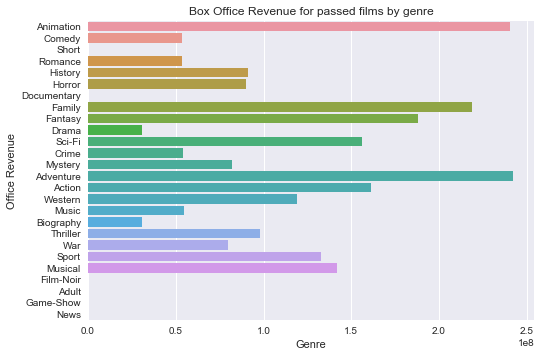

In [46]:
genreDataset = {'genre': genreX, 'Revenue': genreY}
ax = sns.barplot(x="Revenue", y="genre", data=genreDataset, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office Revenue for passed films by genre")

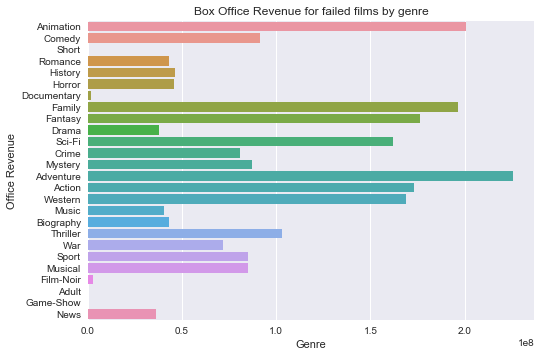

In [48]:
genreDataset = {'genre': failGenreX, 'Revenue': failGenreY}
ax = sns.barplot(x="Revenue", y="genre", data=genreDataset, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office Revenue for failed films by genre")

In [49]:
for i in range(len(genreX)):
   print("Genre: "+ genreX[i] + " Revenue: " + str(genreY[i]))
   print("Genre: "+ failGenreX[i] + " Revenue: " + str(failGenreY[i]))

Genre: Animation Revenue: 240403494.0
Genre: Animation Revenue: 201014240.0
Genre: Comedy Revenue: 53821487.0
Genre: Comedy Revenue: 91423439.5
Genre: Short Revenue: nan
Genre: Short Revenue: 107111.14068261525
Genre: Romance Revenue: 53715899.532102495
Genre: Romance Revenue: 43007690.0
Genre: History Revenue: 91327701.5
Genre: History Revenue: 46322194.2243869
Genre: Horror Revenue: 89809471.5
Genre: Horror Revenue: 45782450.0
Genre: Documentary Revenue: 87697.5662718871
Genre: Documentary Revenue: 1372861.600690256
Genre: Family Revenue: 218583053.0
Genre: Family Revenue: 196245370.0
Genre: Fantasy Revenue: 188183860.0
Genre: Fantasy Revenue: 176093843.63637924
Genre: Drama Revenue: 30930669.465206027
Genre: Drama Revenue: 37969311.0
Genre: Sci-Fi Revenue: 156044575.0
Genre: Sci-Fi Revenue: 162172194.0
Genre: Crime Revenue: 54335294.0
Genre: Crime Revenue: 80580445.2248827
Genre: Mystery Revenue: 81966073.27512588
Genre: Mystery Revenue: 87194988.0
Genre: Adventure Revenue: 24216755

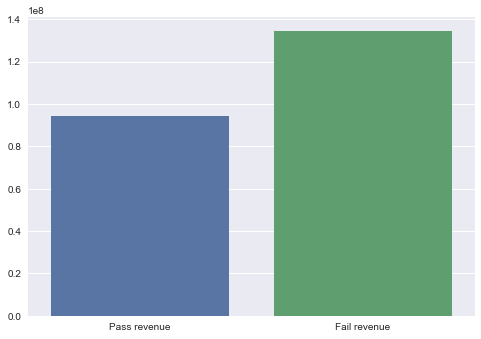

In [51]:
passDataset = bechdelDataset[bechdelDataset.binary == 'PASS']
failDataset = bechdelDataset[bechdelDataset.binary == 'FAIL']
passDataset = passDataset[passDataset.country == 'USA']
failDataset = failDataset[failDataset.country == 'USA']

medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
    
for revenue in failDataset.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()   
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v")   

In [52]:
print(np.std(passDataset.adjusted_box_office.values))
print(np.std(failDataset.adjusted_box_office.values))

262027257.347
296772278.908


In [54]:
print(medianPassValue)
print(medianFailValue)

94260368.0
134368063.5


In [55]:
#Let us use a welch t-test that does not assume equal population variance.
from scipy import stats

passVals = [value for value in passDataset.adjusted_box_office.values if int(value) != 0]
failVals = [value for value in failDataset.adjusted_box_office.values if int(value) != 0]
tstat, pval = stats.ttest_ind(passVals, failVals, equal_var = False)
print(pval)
print(medianPassValue)
print((medianPassValue - medianFailValue)/medianPassValue)

0.000651733476783
94260368.0
-0.4254990336978103


In [ ]:
#Hence there is a significant difference and we reject the null hypothesis of no difference.